In [1]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
image_dir = 'COMP9517_25T3_Lab1_Images'
input_images = []
for i in range(1, 11):
    image_path = image_dir + '/Mountains' + str(i).zfill(2) + '.jpg'
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    input_images.append(img)

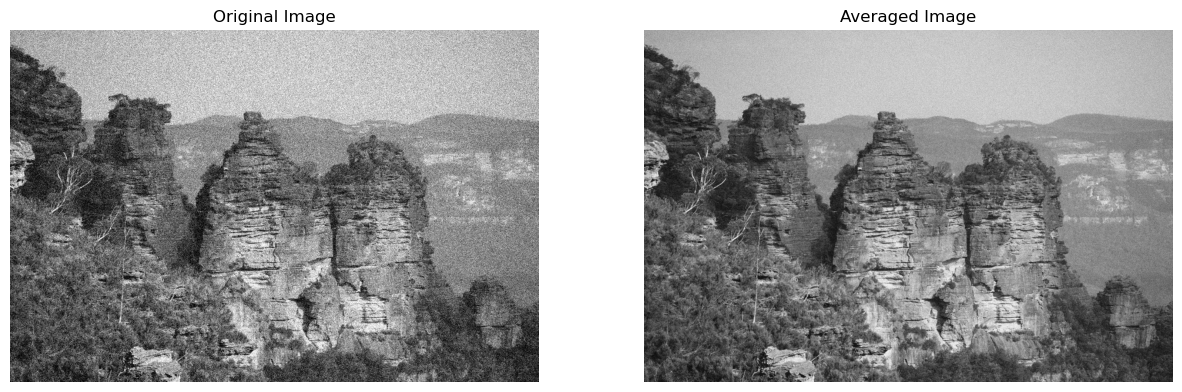

In [4]:
ave_image = np.mean(input_images, axis=0).astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(input_images[0], cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Averaged Image')
plt.imshow(ave_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

In [5]:
x1,y1,x2,y2 = 350, 0, 450, 50
origin_sky = input_images[0][y1:y2, x1:x2]
ave_sky = ave_image[y1:y2, x1:x2]

std_origin = np.std(origin_sky)
std_average = np.std(ave_sky)

print(std_origin / std_average)

3.108781904783121


## Question 1: how much noise reduction should you be able to achieve this way? That is, by what factor should the standard deviation of the noise drop?
Answer: By averaging N images, the standard deviation of the noise should be reduced by a factor of $\sqrt{N}$. For N = 10 images, the theoretical noise reduction factor is $\sqrt{10} \approx 3.16$ .
## Question 2: how much noise reduction did you actually achieve here?
Answer: 3.11

In [6]:
h1 = np.array([[0, 0, 0, 0, 0],
               [0, 1, 2, 1, 0],
               [0, 2, 4, 2, 0],
               [0, 1, 2, 1, 0],
               [0, 0, 0, 0, 0]]) / 16
h2 = np.array([[1, 4, 6, 4, 1],
               [4, 16, 24, 16, 4],
               [6, 24, 36, 24, 6],
               [4, 16, 24, 16, 4],
               [1, 4, 6, 4, 1]]) / 256

DoG = h1 - h2

In [15]:
convolution_h1 = cv2.filter2D(ave_image.astype(np.float32), -1, h1)
convolution_h2 = cv2.filter2D(ave_image.astype(np.float32), -1, h2)

g1 = cv2.filter2D(ave_image.astype(np.float32), -1, DoG)
g2 = convolution_h1 - convolution_h2

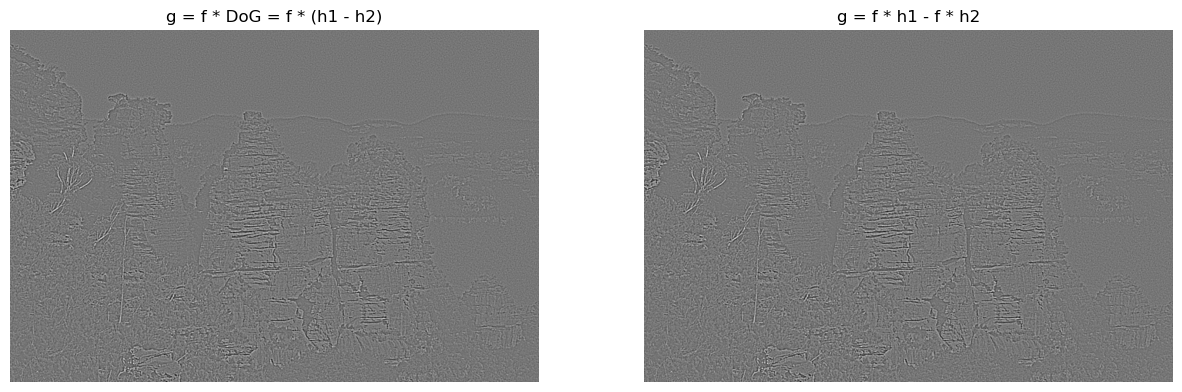

In [16]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(g1, cmap='gray')
plt.title('g = f * DoG = f * (h1 - h2)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(g2, cmap='gray')
plt.title('g = f * h1 - f * h2')
plt.axis('off')

plt.show()

In [17]:
difference = g1 - g2
difference

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(600, 900), dtype=float32)

## Question 3: Which of the two approaches is computationally faster? And why?
Answer: The method by g = f * DoG = f * (h1 - h2) is faster, because it only performs one convolution operation.
## Question 4: Are the corresponding pixel values in the two result images exactly the same?
Answer: The corresponding pixel values in the two result images are not exactly the same and this is because the floating-point numbers can produce errors during calculations.

In [11]:
sharped_img = cv2.add(ave_image.astype(np.float32), cv2.multiply(g1,5))

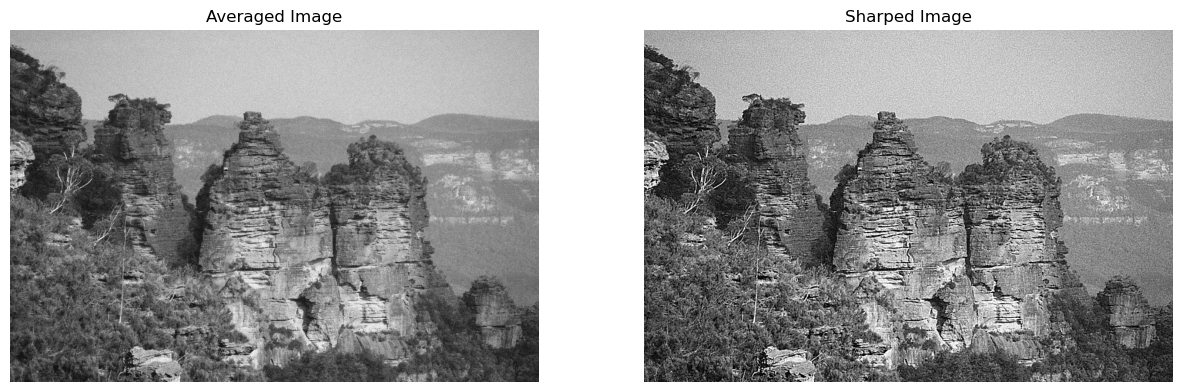

In [12]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title('Averaged Image')
plt.imshow(ave_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharped Image')
plt.imshow(sharped_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

## Question 5: In addition to edge sharpness, what else has been amplified in the output image of Task 3, which we were trying to get rid of in Task 1?
Answer: The noise point also be amplified.
## Question 6: And what is the theoretical explanation for why this happens?
Answer: DoG retains the high-frequency parts of the image, and noise belongs to the high-frequency part, so it is retained. At the same time, through the unsharp masking, the high-frequency part is enhanced, making the noise more obvious.